In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename):
    df = pd.read_csv(filename, delimiter='\t')
    X, y = df[["area", "rooms"]], df["price"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train.rooms,X_train.area,y_train,c='green', marker='o', alpha=0.5)
    ax.scatter(X_test.rooms,X_test.area,y_test,c='red', marker='o', alpha=0.5)
    plt.show()

In [5]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [8]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [9]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(hypothesis(X, theta) - y, X) / m
    return d_theta

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = alpha*derivative(X, y, theta)
        theta = theta - delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [11]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 20)
    theta_1 = np.linspace(-10, 10, 20)
    theta_2 = np.linspace(-10, 10, 20)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            for k, t2 in enumerate(theta_2):
                # and this is only one iteration for t0 (?)
                theta = np.array([t0, t1, t2])
                J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    #plt.zlabel('theta_2')
    plt.title('Surface plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [12]:
X, y = load_datasets('real_estate.tsv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(47, 2), y=(47,)


Розбиття датасету на частини:

In [13]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(37, 2), y=(37,)
Test set: X=(10, 2), y=(10,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

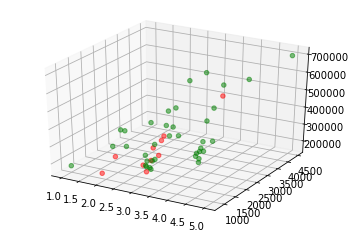

In [14]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [15]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0, 0])

Для спрощення записів аліас для вектора передбачуваних значень

In [16]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [17]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (37, 3)
y: (37,)
70684279891.97298


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [18]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [19]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}; Theta 2: {}'.format(new_theta[0], new_theta[1], new_theta[2]))

Theta 0: 354137.62927645573; Theta 1: 110242.1047451958; Theta 2: -9908.818454517903


Відображення штрафної функції як функції від theta0, theta1.

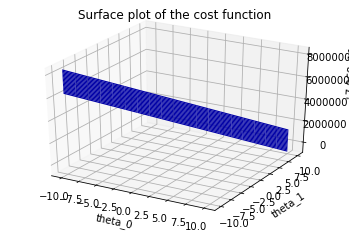

In [20]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

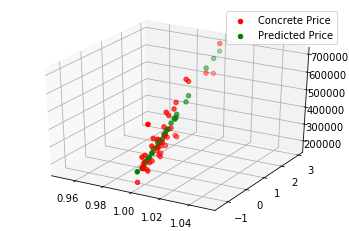

In [21]:
y_algorithm = np.dot(X, new_theta)
#since theta0 and theta1 are the greatest in theta array:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='r', label='Concrete Price')
ax.scatter(X[:, 0], X[:, 1], y_algorithm, color='g', label='Predicted Price')
ax.legend()
plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [22]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = prepare_X((X_test-mean)/std)
#X_test_proc, m, s = normalize(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

    y_actual         y_pred        err
35    249900  266100.466805   6.482780
20    252900  311263.657546  23.077761
6     314900  279375.707720  11.281134
25    249900  219979.268988  11.973082
44    179900  198658.243950  10.427039
17    199900  238591.977899  19.355667
4     539900  467389.964039  13.430272
3     232000  275846.242672  18.899243
11    347000  343151.607373   1.109047
12    329999  328097.210459   0.576302
743678162.1946464
